In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set();

import numpy as np
import pandas as pd

# Making (first time) the fake data

In [2]:
from sklearn.datasets import make_blobs

In [31]:
X, y = make_blobs(n_samples= 200, n_features= 2, centers= 4, cluster_std= 1.8)

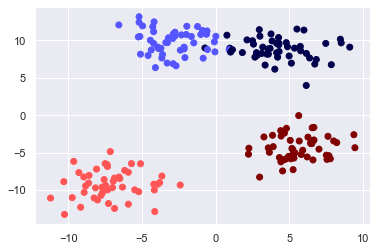

In [32]:
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= 'seismic')

## Now, the actual part... Yes directly...

In [33]:
from sklearn.cluster import KMeans

In [35]:
model = KMeans(n_clusters= 4)

In [36]:
model

KMeans(n_clusters=4)

In [37]:
model.fit(X, y)

KMeans(n_clusters=4)

In [38]:
model.cluster_centers_

array([[ 5.62594306, -4.34168607],
       [-2.83772116,  9.84384328],
       [-7.11845459, -9.27260894],
       [ 4.36547561,  8.79454738]])

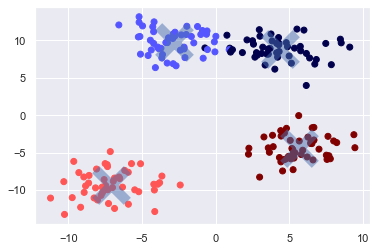

In [46]:
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= 'seismic')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker= 'x', s= 1000, linewidth= 10, alpha= 0.5)

# But wait, it has `ONLY FOUND` the centers, but we don't know THE ACTUAL COLORS... 

Let's get the colors, I mean the lables, that it has found...

In [47]:
model.labels_

array([3, 1, 0, 2, 3, 2, 2, 3, 0, 3, 2, 2, 3, 1, 1, 0, 3, 2, 2, 0, 1, 1,
       2, 0, 0, 0, 2, 3, 1, 0, 2, 0, 2, 1, 1, 3, 2, 3, 3, 1, 3, 1, 2, 1,
       2, 0, 1, 2, 3, 2, 2, 1, 0, 2, 3, 0, 1, 1, 3, 2, 3, 0, 3, 3, 2, 0,
       1, 3, 1, 2, 3, 0, 2, 2, 2, 2, 1, 0, 0, 0, 3, 2, 0, 0, 3, 3, 1, 3,
       0, 1, 2, 0, 2, 0, 1, 3, 0, 3, 1, 1, 3, 0, 3, 1, 0, 1, 2, 2, 2, 0,
       1, 3, 1, 1, 2, 1, 2, 1, 3, 0, 3, 3, 2, 1, 3, 3, 1, 2, 2, 0, 1, 1,
       0, 3, 3, 3, 0, 3, 2, 0, 0, 0, 2, 3, 3, 1, 1, 2, 2, 3, 3, 0, 3, 3,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0, 1, 0, 2, 3,
       1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1, 3,
       3, 1])

## WHOv!

Text(0.5, 1.0, 'PREDICTED')

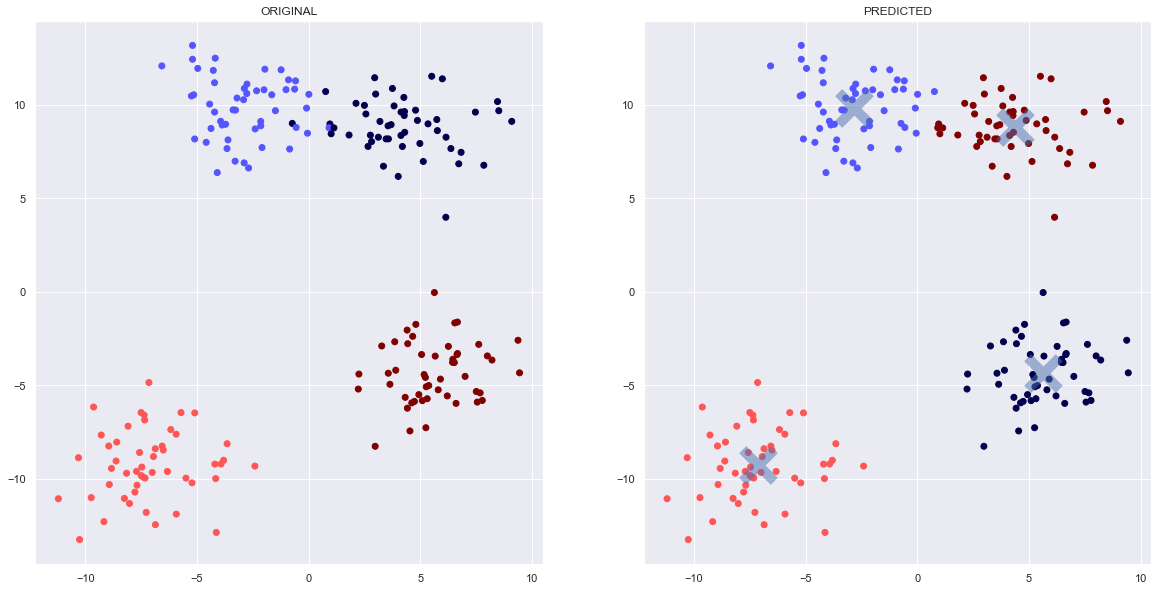

In [51]:
fig, axes = plt.subplots(1, 2, figsize= (20, 10))

axes[0].scatter(X[:, 0], X[:, 1], c= y, cmap= 'seismic')
axes[0].set_title("ORIGINAL")

axes[1].scatter(X[:, 0], X[:, 1], c= model.labels_, cmap= 'seismic')
axes[1].scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker= 'x', s= 1000, linewidth= 10, alpha= 0.5)
axes[1].set_title("PREDICTED")

So good!

## See bro, as this is an *Unsupervised* we **would not have the Lables** in the real world scenario... but here as we have the data generated, we have the labels to compare with...

# `ONLY HERE` we can compare the Lables and get the accuracy. Keep that in your mind man.

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
accuracy_score(y, model.labels_)

0.495

### Seems low? NO! It is better than this, but as the numbers of clusters are changed, it has changed too! (Let's tweak it)

    Orange = 0
    Purple = 1
    Black = 2
    Brown = 3

In [55]:
y #No need to change here

array([0, 1, 3, 2, 0, 2, 2, 0, 3, 0, 2, 2, 0, 1, 1, 3, 0, 2, 2, 3, 1, 1,
       2, 3, 3, 3, 2, 0, 1, 3, 2, 3, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0,
       2, 3, 1, 2, 0, 2, 2, 1, 3, 2, 0, 3, 1, 1, 0, 2, 1, 3, 0, 0, 2, 3,
       1, 0, 1, 2, 0, 3, 2, 2, 2, 2, 1, 3, 3, 3, 0, 2, 3, 3, 0, 0, 1, 0,
       3, 1, 2, 3, 2, 3, 1, 0, 3, 0, 1, 1, 0, 3, 0, 1, 3, 1, 2, 2, 2, 3,
       1, 0, 1, 1, 2, 1, 2, 0, 0, 3, 0, 0, 2, 1, 0, 0, 1, 2, 2, 3, 1, 1,
       3, 0, 0, 0, 3, 0, 2, 3, 3, 3, 2, 0, 0, 1, 1, 2, 2, 0, 0, 3, 0, 0,
       3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 3, 0, 3, 1, 3, 2, 0,
       1, 3, 1, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 3, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

In [77]:
pred = model.labels_.copy()

Considering the graph, Orange and Purple are labled correctly, no need to change but we need to change *Black to Brown* and *Brown to Black* ie `2 <-> 3`

In [94]:
pred = model.labels_.copy()

_1 = 0
_2 = 3

pred[pred == _1], pred[pred == _2] = _2, _1
accuracy_score(y, pred)

0.735

Cool! Let's do it!

In [95]:
pred

array([0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 1,
       2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])